In [40]:
import cv2
import numpy as np
import imageio as iio
from scipy import ndimage
from matplotlib import pyplot as plt

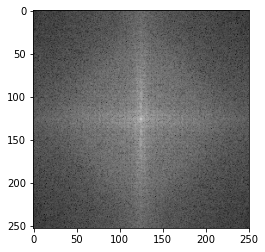

In [41]:
wall = cv2.imread('wall.jpg',0)
(m,n) = wall.shape
wallF = np.fft.fftshift(np.fft.fft2(wall))
plt.imshow(20*np.log10(np.abs(wallF)), cmap='gray');

### Ideal

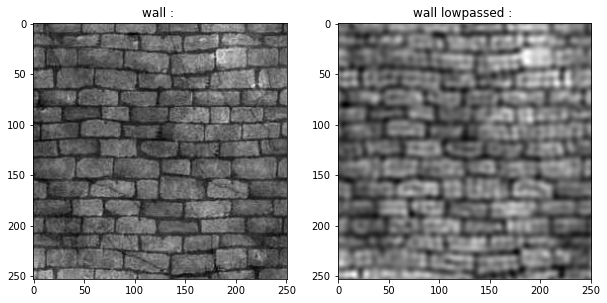

In [42]:
R = 30
H = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        if((i-m/2)**2+(j-n/2)**2 < R**2):
            H[i,j] = 1
wallF_lp = wallF*H
#plt.imshow(20*np.log10(np.abs(wallF_lp)), cmap='gray');
wall_lp = np.fft.ifft2(np.fft.ifftshift(wallF_lp))

plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(wall,cmap='gray');
plt.title('wall : ');

plt.subplot(1,2,2)
plt.imshow(np.real(wall_lp),cmap='gray');
plt.title('wall lowpassed : ');

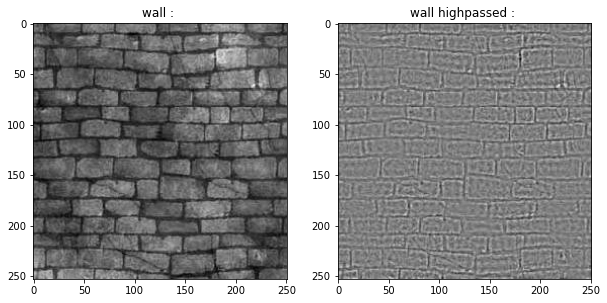

In [43]:
R = 30
H = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        if((i-m/2)**2+(j-n/2)**2 > R**2):
            H[i,j] = 1
            
wallF_hp = wallF*(H)
#plt.imshow(20*np.log10(np.abs(wallF_hp)), cmap='gray');
wall_hp = np.fft.ifft2(np.fft.ifftshift(wallF_hp))

plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(wall,cmap='gray');
plt.title('wall : ');

plt.subplot(1,2,2)
plt.imshow(np.real(wall_hp),cmap='gray');
plt.title('wall highpassed : ');

### Gaussian

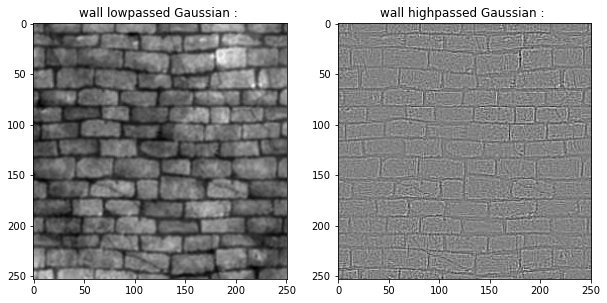

In [48]:
wall_lpG = cv2.GaussianBlur(wall,(3,3),10)

wall_hpGF = wallF - np.fft.fftshift(np.fft.fft2(wall_lpG))
wall_hpG = np.fft.ifft2(np.fft.ifftshift(wall_hpGF))

plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(np.real(wall_lpG),cmap='gray');
plt.title('wall lowpassed Gaussian : ');

plt.subplot(1,2,2)
plt.imshow(np.real(wall_hpG),cmap='gray');
plt.title('wall highpassed Gaussian : ');

### Laplasian

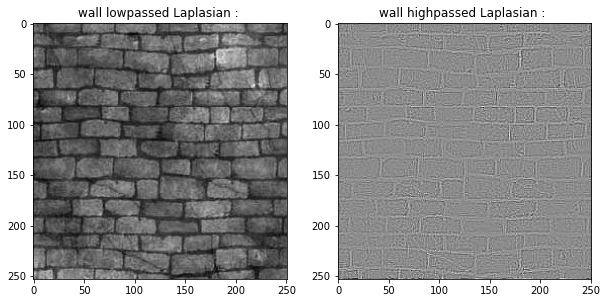

In [28]:
L = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        L[i,j] = - ( ((i-m/2)/m)**2+((j-n/2)/n)**2 )
  

wall_lpLF = wallF*(1-L)
wall_lpL = np.fft.ifft2(np.fft.ifftshift(wall_lpLF))

wall_hpLF = wallF*L
wall_hpL = np.fft.ifft2(np.fft.ifftshift(wall_hpLF))

        
plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(np.real(wall_lpL),cmap='gray');
plt.title('wall lowpassed Laplasian : ');

plt.subplot(1,2,2)
plt.imshow(np.real(wall_hpL),cmap='gray');
plt.title('wall highpassed Laplasian : ');

### Butterworth

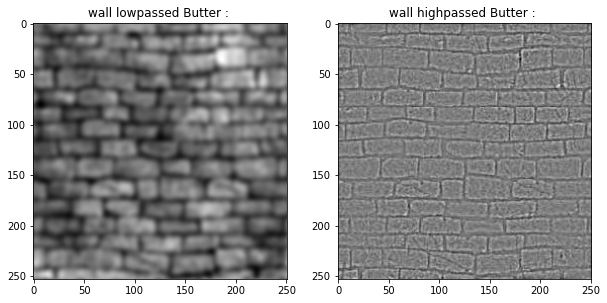

In [39]:
B = np.zeros((m,n))
D0 = 25
order = 3
for i in range(m):
    for j in range(n):
        r = np.sqrt((i-m/2)**2+(j-n/2)**2)
        B[i,j] = 1/(1+(r/D0)**(2*order))
  

wall_lpBF = wallF*B
wall_lpB = np.fft.ifft2(np.fft.ifftshift(wall_lpBF))

wall_hpBF = wallF*(1-B)
wall_hpB = np.fft.ifft2(np.fft.ifftshift(wall_hpBF))

        
plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(np.real(wall_lpB),cmap='gray');
plt.title('wall lowpassed Butter : ');

plt.subplot(1,2,2)
plt.imshow(np.real(wall_hpB),cmap='gray');
plt.title('wall highpassed Butter : ');

### Compare

In [45]:
#in the pdf !